# Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler, BatchSampler
import numpy as np

In [2]:
train_data = pd.read_csv("./train.csv").dropna()
test_data = pd.read_csv("./test.csv").dropna()

#### Attempt 1: *Only 183 rows

In [3]:
type(train_data)

pandas.core.frame.DataFrame

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [6]:
type(train_data['Age'])

pandas.core.series.Series

In [7]:
torch.tensor(train_data['Age'].values)

tensor([38.0000, 35.0000, 54.0000,  4.0000, 58.0000, 34.0000, 28.0000, 19.0000,
        49.0000, 65.0000, 45.0000, 29.0000, 25.0000, 23.0000, 46.0000, 71.0000,
        23.0000, 21.0000, 47.0000, 24.0000, 32.5000, 54.0000, 19.0000, 37.0000,
        24.0000, 36.5000, 22.0000, 61.0000, 56.0000, 50.0000,  1.0000,  3.0000,
        44.0000, 58.0000,  2.0000, 40.0000, 31.0000, 32.0000, 38.0000, 35.0000,
        44.0000, 37.0000, 29.0000, 62.0000, 30.0000, 52.0000, 40.0000, 58.0000,
        35.0000, 37.0000, 63.0000, 19.0000, 36.0000,  2.0000, 50.0000,  0.9200,
        17.0000, 30.0000, 24.0000, 18.0000, 31.0000, 40.0000, 36.0000, 36.0000,
        16.0000, 45.5000, 38.0000, 29.0000, 41.0000, 45.0000,  2.0000, 24.0000,
        24.0000, 22.0000, 60.0000, 24.0000, 25.0000, 27.0000, 36.0000, 23.0000,
        24.0000, 33.0000, 32.0000, 28.0000, 50.0000, 14.0000, 64.0000,  4.0000,
        52.0000, 30.0000, 49.0000, 65.0000, 48.0000, 47.0000, 23.0000, 25.0000,
        35.0000, 58.0000, 55.0000, 54.00

In [8]:
len(torch.tensor(train_data['Age'].values))

183

In [9]:
print(train_data.shape)
print(test_data.shape)

(183, 12)
(87, 11)


In [10]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
print(test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
print(f"Total rows = {train_data.shape[0]}")
print("No of unique:")
print()
for column in train_data.columns:
	print(f"{column} = {train_data[column].unique().shape}")

Total rows = 183
No of unique:

PassengerId = (183,)
Survived = (2,)
Pclass = (3,)
Name = (183,)
Sex = (2,)
Age = (63,)
SibSp = (4,)
Parch = (4,)
Ticket = (127,)
Fare = (93,)
Cabin = (133,)
Embarked = (3,)


Making dictionaries to convert values to numbers.

In [13]:
sexdict = {}
ticketdict = {}
cabindict = {}
embarkeddict = {}

for i,item in enumerate(train_data['Sex'].unique()):
    sexdict[item] = i
for i,item in enumerate(train_data['Ticket'].unique()):
    ticketdict[item] = i
for i,item in enumerate(train_data['Cabin'].unique()):
    cabindict[item] = i
for i,item in enumerate(train_data['Embarked'].unique()):
    embarkeddict[item] = i
train_data['Sex'] = train_data['Sex'].replace(sexdict)
train_data['Ticket'] = train_data['Ticket'].replace(ticketdict)
train_data['Cabin'] = train_data['Cabin'].replace(cabindict)
train_data['Embarked'] = train_data['Embarked'].replace(embarkeddict)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,71.2833,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,1,53.1000,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,2,51.8625,2,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,3,16.7000,3,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,4,26.5500,4,1


In [14]:
embarkeddict

{'C': 0, 'S': 1, 'Q': 2}

In [15]:
torch.tensor(train_data[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].values)

tensor([[  1.0000,   0.0000,  38.0000,  ...,  71.2833,   0.0000,   0.0000],
        [  1.0000,   0.0000,  35.0000,  ...,  53.1000,   1.0000,   1.0000],
        [  1.0000,   1.0000,  54.0000,  ...,  51.8625,   2.0000,   1.0000],
        ...,
        [  1.0000,   0.0000,  56.0000,  ...,  83.1583, 130.0000,   0.0000],
        [  1.0000,   0.0000,  19.0000,  ...,  30.0000, 131.0000,   1.0000],
        [  1.0000,   1.0000,  26.0000,  ...,  30.0000, 132.0000,   0.0000]],
       dtype=torch.float64)

In [16]:
train_df = train_data.sample(frac=0.8)
val_df = train_data.drop(train_df.index)
print(len(train_df))
print(len(val_df))
print(len(train_data))
train_df

146
37
183


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,333,0,1,"Graham, Mr. George Edward",1,38.0,0,1,41,153.4625,56,1
269,270,1,1,"Bissette, Miss. Amelia",0,35.0,0,0,42,135.6333,41,1
512,513,1,1,"McGough, Mr. James Robert",1,36.0,0,0,79,26.2875,79,1
707,708,1,1,"Calderhead, Mr. Edward Pennington",1,42.0,0,0,106,26.2875,109,1
867,868,0,1,"Roebling, Mr. Washington Augustus II",1,31.0,0,0,123,50.4958,129,1
...,...,...,...,...,...,...,...,...,...,...,...,...
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",1,28.0,0,0,66,26.5500,66,1
331,332,0,1,"Partner, Mr. Austen",1,45.5,0,0,56,28.5000,55,1
583,584,0,1,"Ross, Mr. John Hugo",1,36.0,0,0,91,40.1250,90,0
124,125,0,1,"White, Mr. Percival Wayland",1,54.0,0,1,16,77.2875,16,1


Using only 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' columns as others have mostly unique values.

In [17]:
class Dataset():
    def __init__(self, df, drop_cols=[],test=False):
        # self.x = torch.tensor(df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].values,dtype=float)
        self.x = torch.tensor(df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].drop(columns=drop_cols).values,dtype=float)
        self.test = test
        if not self.test:
            if drop_cols == []:
                self.y = torch.tensor(df['Survived'].values,dtype=int)
            else:
                self.y = torch.tensor(df['Survived'].values,dtype=float)
        else:
            if drop_cols == []:
                torch.Tensor([0]).type(torch.int64)
            else:
                torch.Tensor([0]).type(torch.float64)
    def __len__(self): return len(self.x)
    def __getitem__(self, i):
        if not self.test: return self.x[i],self.y[i]
        else: return self.x[i],torch.Tensor([0])

In [18]:
train_ds,val_ds = Dataset(train_df),Dataset(val_df)
assert len(train_ds)==len(train_df)
assert len(val_ds)==len(val_df)

In [19]:
xb,yb = train_ds[0:5]
print(xb.shape)
print(yb.shape)
xb,yb

torch.Size([5, 7])
torch.Size([5])


(tensor([[  1.0000,   1.0000,  38.0000,   0.0000,   1.0000, 153.4625,   1.0000],
         [  1.0000,   0.0000,  35.0000,   0.0000,   0.0000, 135.6333,   1.0000],
         [  1.0000,   1.0000,  36.0000,   0.0000,   0.0000,  26.2875,   1.0000],
         [  1.0000,   1.0000,  42.0000,   0.0000,   0.0000,  26.2875,   1.0000],
         [  1.0000,   1.0000,  31.0000,   0.0000,   0.0000,  50.4958,   1.0000]],
        dtype=torch.float64),
 tensor([0, 1, 1, 1, 0]))

In [20]:
class Modified_Linear(nn.Module):
    def __init__(self, n_in, n_out, p, q):
        super().__init__()
        self.w1 = torch.randn(n_in,n_out,dtype=float).requires_grad_()
        self.w2 = torch.randn(p,q,dtype=float).requires_grad_()
        self.b = torch.zeros(n_out,dtype=float).requires_grad_()
    def forward(self, inp):
        return torch.einsum('ab,bc,pq->acpq', (inp, self.w1, self.w2)) + self.b[None,:,None,None]
    def parameters(self):
        return (self.w1,self.w2,self.b)

In [21]:
class Dropout(nn.Module):
    def __init__(self, p=0.5):
        super().__init__()
        self.p = p
    def forward(self, inp):
        if self.training: inp = inp.mul(torch.tensor(np.random.choice([0,1], size=inp.shape[1], p=[self.p,1-self.p])))
        return inp

In [22]:
class ReLU_Sum(nn.Module):
    def __init__(self,clamp=1):
        super().__init__()
        self.clamp = clamp
    def forward(self,inp):
        if self.clamp:
            # return torch.einsum('abcd->ab',inp).clamp(min=0)/(inp.shape[2]*inp.shape[3])
            # return torch.einsum('abcd->ab',inp).clamp(min=0)
            return torch.mean(inp,dim=[2,3]).clamp(min=0)
        else:
            # return torch.einsum('abcd->ab',inp)/(inp.shape[2]*inp.shape[3])
            # return torch.einsum('abcd->ab',inp)
            return torch.mean(inp,dim=[2,3])

In [23]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        # self._modules = {}
        # self.layers = nn.ModuleList([Modified_Linear(n_in,nh,p,q),ReLU_Sum(),Modified_Linear(nh,n_out,p,q),ReLU_Sum(0)])
        self.layers = layers
        # self.l1 = Modified_Linear(n_in,nh,p,q)
        # self.r1 = ReLU_Sum()
        # self.l2 = Modified_Linear(nh,n_out,p,q)
        # self.r2 = ReLU_Sum(0)

    # def __setattr__(self,k,v):
    #     if not k.startswith("_"): self._modules[k] = v
    #     super().__setattr__(k,v)

    # def __repr__(self): return f'{self._modules}'

    def parameters(self):
        for l in self.layers: yield from l.parameters()
        # for l in self._modules.values(): yield from l.parameters()
        
    # def __call__(self, x, targ):
    def __call__(self, x):
        for l in self.layers: x = l(x)
        # for l in self._modules.values(): x = l(x)
        # return F.mse_loss(x,targ[:,None])
        return x

In [24]:
def accuracy(out, targ):
	if(out.shape[1]==1): return (out.round()==targ).float().mean()
	else: return (out.argmax(dim=1)==targ).float().mean()

In [25]:
def report(loss, preds, yb):
	acc = accuracy(preds, yb)
	print(f'{loss}, {acc}')
	return acc

In [26]:
def get_model(p1,p2):
    layers = nn.ModuleList([Modified_Linear(7,15,3,3),
                   ReLU_Sum(),
                   Dropout(p1),
                   Modified_Linear(15,2,3,3),
                   ReLU_Sum(0),
                   Dropout(p2)])
    model = Model(layers)
    return model

In [27]:
def fit(epochs, model, loss_func, opt, sch, train_dl, valid_dl, verbose=False):
    
    loss_hist = []
    valloss_hist = []
    valacc_hist = []
    
    for epoch in range(epochs):
        model.train()
        tot_loss,count = 0.,0
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb)
            n = len(xb)
            count += n
            tot_loss += loss.item()*n
            loss.backward()
            opt.step()
            opt.zero_grad()
            
        loss_hist.append(tot_loss/count)

        model.eval()
        with torch.no_grad():
            tot_loss,tot_acc,count = 0.,0.,0
            for xb,yb in valid_dl:
                pred = model(xb)
                n = len(xb)
                count += n
                tot_loss += loss_func(pred,yb).item()*n
                tot_acc  += accuracy (pred,yb).item()*n
        
        acc = tot_acc/count
        valloss_hist.append(tot_loss/count)
        valacc_hist.append(tot_acc/count)
        if verbose:
            print(epoch, tot_loss/count, tot_acc/count)

        sch.step()
    return (loss_hist,valloss_hist,valacc_hist)

In [28]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, shuffle=False, **kwargs))

In [29]:
bs = 100
train_dl,valid_dl = get_dls(train_ds, val_ds, bs)

In [30]:
model = get_model(0.2,0.4)

In [31]:
for p in model.parameters(): print(p.shape)

torch.Size([7, 15])
torch.Size([3, 3])
torch.Size([15])
torch.Size([15, 2])
torch.Size([3, 3])
torch.Size([2])


In [32]:
lr = 0.5
epochs = 500
opt = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-7)
sch = optim.lr_scheduler.ExponentialLR(opt, 0.999)
loss_func = F.cross_entropy

lh,vlh,vah = fit(epochs, model, loss_func, opt, sch, train_dl, valid_dl)

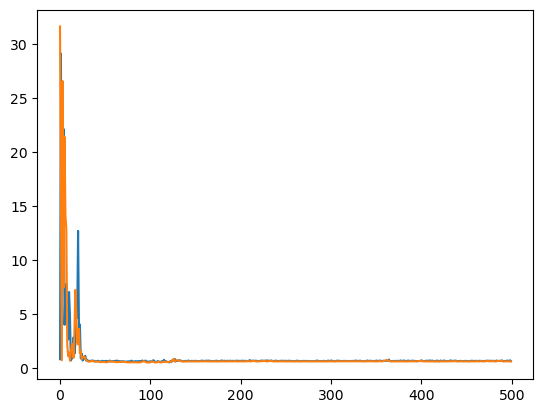

In [33]:
plt.plot(lh)
plt.plot(vlh)

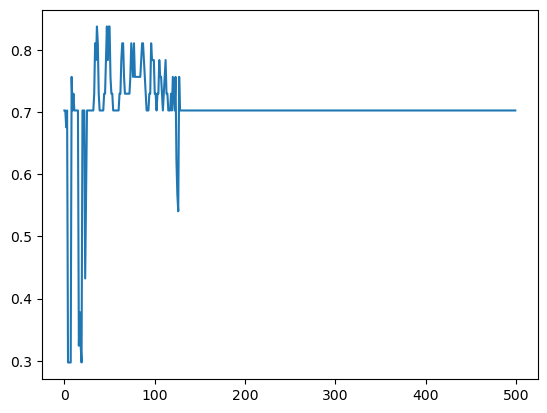

In [34]:
plt.plot(vah)

In [35]:
# Best of n Val Acc
def test_loop(p1,p2,epochs,n,lr,wd,exp,plot5=False,verbose=False):
    VA = []
    for i in range(n):
        model = get_model(p1,p2)
        lr = lr
        opt = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
        sch = optim.lr_scheduler.ExponentialLR(opt, exp)
        loss_hist,valloss_hist,val_acc = fit(epochs, model, loss_func, opt, sch, train_dl, valid_dl, verbose=verbose)
        VA.append(val_acc)

    if plot5:
        plt.plot(VA[0])
        plt.plot(VA[1])
        plt.plot(VA[2])
        plt.plot(VA[3])
        plt.plot(VA[4])

    sum = 0
    max = 0
    min = 1
    for i in range(n):
        sum += VA[i][-1] 
        if VA[i][-1] > max:
            max = VA[i][-1]
        if VA[i][-1] < min:
            min = VA[i][-1]
    
    return (VA,sum/n,max,min,loss_hist,valloss_hist,model)

In [36]:
############ Commented to not run accidentally, takes a while ############

# # Hyperparameters

# # p1 = 0.4
# # p2 = 0.4
# epochs = 500
# n = 10
# lr = 0.05
# weight_decay = 1e-7
# exponential = 0.995

# p_test = [0,0.1,0.2,0.3,0.4,0.5,0.6]

# maxmax = 0
# minmin = 1
# maxavg = 0
# best_p1 = 0
# best_p2 = 0
# print("Average  |  Maximum  |  Minimum  |  p1  |  p2")
# for p1 in p_test:
#     for p2 in p_test:
#         _,avg,max,min,_,_,_ = test_loop(p1,p2,epochs,n,lr,weight_decay,exponential,plot5=False)
#         print(avg,max,min,p1,p2)

#         if avg > maxavg:
#             maxavg = avg
#             best_p1 = p1
#             best_p2 = p2
#             print("New Max Avg!")
#         if max > maxmax:
#             maxmax = max
#         if min < minmin:
#             minmin = min


# print(f"Maximum of Average accuracy at end of 500 epochs= {maxavg} at p1= {best_p1}, p2= {best_p2}")
# print(f"Maximum of Max accuracy at end of 500 epochs= {maxmax}")
# print(f"Minimum of Min accuracy at end of 500 epochs= {minmin}")

Using just 146 lines of training data, from above loop, testing on Validation set (37 lines), p1 = 0.6 and p2 = 0.3 gives the best average accuracy of:

#### $\approx 78.4$%

In [37]:
p1 = 0.6
p2 = 0.3
epochs = 500
n = 1
lr = 0.05
weight_decay = 1e-7
exponential = 0.995
va,avg,_,_,lh,vlh,model = test_loop(p1,p2,epochs,n,lr,weight_decay,exponential)


Validation Accuracy = 0.7297297120094299


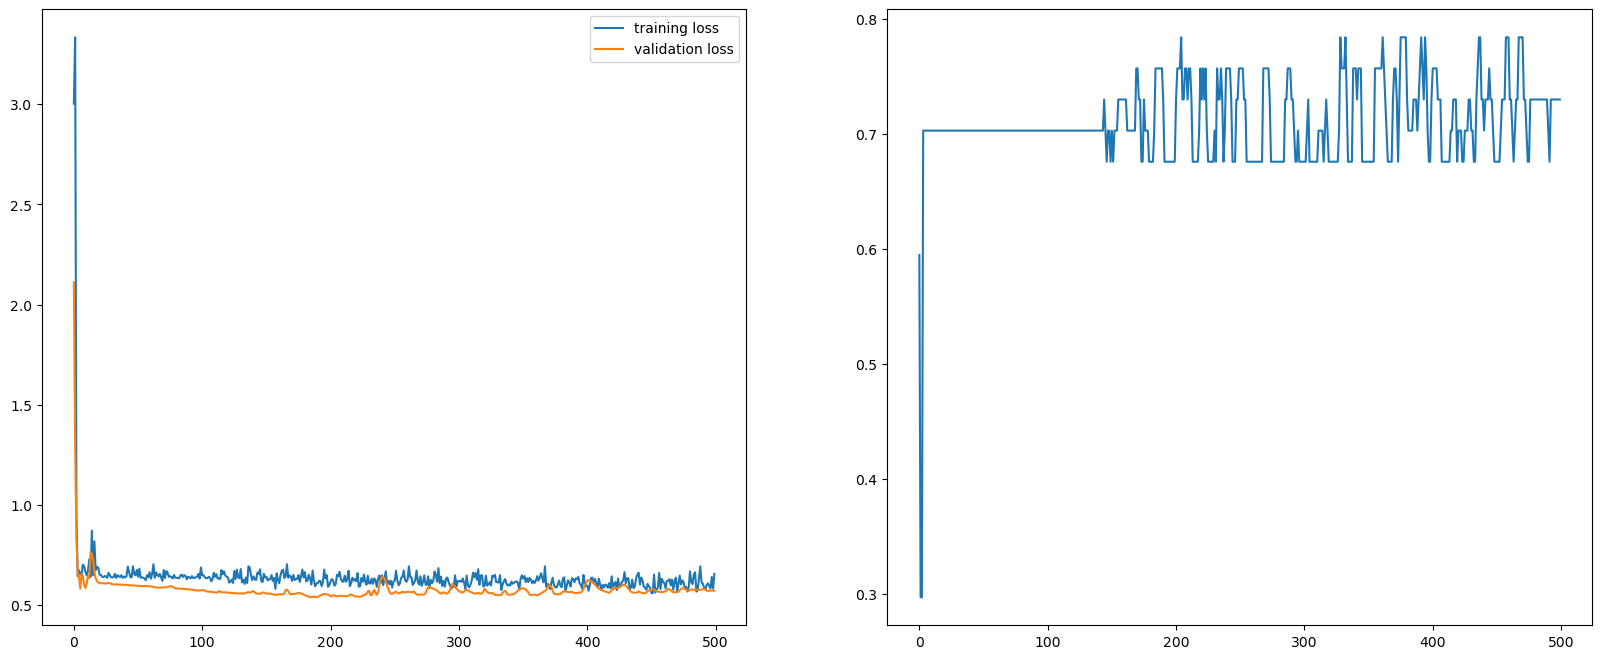

In [38]:
print(f"Validation Accuracy = {avg}")


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(lh,label="training loss")
plt.plot(vlh,label="validation loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(va[-1])

In [39]:
len(test_data)

87

In [40]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [41]:
test_data['Sex'] = test_data['Sex'].replace(sexdict)
test_data['Ticket'] = test_data['Ticket'].replace(ticketdict)
test_data['Cabin'] = test_data['Cabin'].replace(cabindict)
test_data['Embarked'] = test_data['Embarked'].replace(embarkeddict)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,13,61.1750,13,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,51,262.3750,50,0
26,918,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,9,61.9792,B36,0
28,920,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,1
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,D40,0
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,SC/PARIS 2166,13.8625,D38,0
407,1299,1,"Widener, Mr. George Dunton",1,50.0,1,1,63,211.5000,C80,0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,35,90.0000,34,2


In [42]:
test_ds = Dataset(test_data,test=True)
assert len(test_ds)==len(test_data)

In [43]:
bs = 100
test_dl = DataLoader(test_ds, batch_size=bs*2, shuffle=False)

In [44]:
next(iter(test_dl))[0].shape

torch.Size([87, 7])

In [45]:
pred = torch.Tensor()
model.eval()
with torch.no_grad():
	tot_loss,tot_acc,count = 0.,0.,0
	for xb,yb in test_dl:
		pred = torch.cat([pred,model(xb)])

The below tensor contains the predictions

In [46]:
pred

tensor([[-1.2123,  1.1946],
        [-0.6410,  0.3411],
        [-1.1253,  0.8582],
        [-1.0830,  1.0338],
        [ 0.1400, -0.2880],
        [-0.9362,  0.7287],
        [-0.6151,  0.3750],
        [ 0.2496, -0.4441],
        [-0.4233,  0.0458],
        [-1.0140,  0.9400],
        [-1.5393,  1.5621],
        [-0.0456, -0.0248],
        [-1.4925,  1.4699],
        [-1.6180,  1.8333],
        [-0.3600,  0.2904],
        [-0.8616,  0.4477],
        [-0.4630,  0.4197],
        [-1.3701,  1.3060],
        [-1.2829,  1.2389],
        [ 0.1196, -0.3529],
        [-0.8305,  0.3071],
        [-0.8722,  0.7519],
        [-0.1458, -0.2008],
        [-0.8082,  0.4891],
        [-0.5055,  0.5558],
        [-0.5743,  0.4556],
        [-1.0037,  0.5487],
        [-1.3289,  1.5192],
        [-0.7917,  0.5657],
        [-0.9869,  0.7224],
        [ 0.5791, -0.8311],
        [-0.8118,  0.3354],
        [-1.1255,  1.0848],
        [-1.4695,  1.5477],
        [ 0.2640, -0.4352],
        [-0.1245, -0

### Attempt 2:

Lets do the same with a differently pre-processed dataset- Remove the Cabin column as it has a lot of Nan values, then do dropna(). We can also drop few other columns which are nearly unique to every passenger so shouldn't affect the performance

In [47]:
data1 = pd.read_csv("./train.csv")
for col in data1:
    print(f"{col} has {data1[col].isna().sum()} empty values")

PassengerId has 0 empty values
Survived has 0 empty values
Pclass has 0 empty values
Name has 0 empty values
Sex has 0 empty values
Age has 177 empty values
SibSp has 0 empty values
Parch has 0 empty values
Ticket has 0 empty values
Fare has 0 empty values
Cabin has 687 empty values
Embarked has 2 empty values


In [48]:
test_data1 = pd.read_csv("./test.csv")
for col in test_data1:
    print(f"{col} has {test_data1[col].isna().sum()} empty values")

PassengerId has 0 empty values
Pclass has 0 empty values
Name has 0 empty values
Sex has 0 empty values
Age has 86 empty values
SibSp has 0 empty values
Parch has 0 empty values
Ticket has 0 empty values
Fare has 1 empty values
Cabin has 327 empty values
Embarked has 0 empty values


In [49]:
data2 = pd.read_csv("./train.csv").drop(columns=['Cabin','PassengerId','Ticket','Name']).dropna()
test_data2 = pd.read_csv("./test.csv").drop(columns=['Cabin','PassengerId','Ticket','Name']).dropna()
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
sexdict = {}
embarkeddict = {}

for i,item in enumerate(data2['Sex'].unique()):
    sexdict[item] = i
for i,item in enumerate(data2['Embarked'].unique()):
    embarkeddict[item] = i
data2['Sex'] = data2['Sex'].replace(sexdict)
data2['Embarked'] = data2['Embarked'].replace(embarkeddict)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [51]:
print(len(data2))
train_df = data2.sample(frac=0.8)
val_df = data2.drop(train_df.index)
print(len(train_df))
print(len(val_df))
print(len(train_data))
train_df

712
570
142
183


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
487,0,1,0,58.0,0,0,29.7000,1
721,0,3,0,17.0,1,0,7.0542,0
321,0,3,0,27.0,0,0,7.8958,0
69,0,3,0,26.0,2,0,8.6625,0
40,0,3,1,40.0,1,0,9.4750,0
...,...,...,...,...,...,...,...,...
352,0,3,0,15.0,1,1,7.2292,1
553,1,3,0,22.0,0,0,7.2250,1
500,0,3,0,17.0,0,0,8.6625,0
473,1,2,1,23.0,0,0,13.7917,1


In [52]:
train_ds,val_ds = Dataset(train_df),Dataset(val_df)
assert len(train_ds)==len(train_df)
assert len(val_ds)==len(val_df)

In [104]:
def get_model(p1,p2):
    layers = nn.ModuleList([Modified_Linear(7,15,3,3),
                   ReLU_Sum(),
                   Dropout(p1),
                   Modified_Linear(15,2,3,3),
                   ReLU_Sum(0),
                   Dropout(p2)])
    model = Model(layers)
    return model

In [105]:
bs = 100
train_dl,valid_dl = get_dls(train_ds, val_ds, bs)

Average  |  Maximum  |  Minimum  |  p1  |  p2
0.8028169274330139 0.8028169274330139 0.8028169274330139 0.3 0.3
New Max Avg!
Maximum of Average accuracy at end of 500 epochs= 0.8028169274330139 at p1= 0.3, p2= 0.3
Maximum of Max accuracy at end of 500 epochs= 0.8028169274330139
Minimum of Min accuracy at end of 500 epochs= 0.8028169274330139


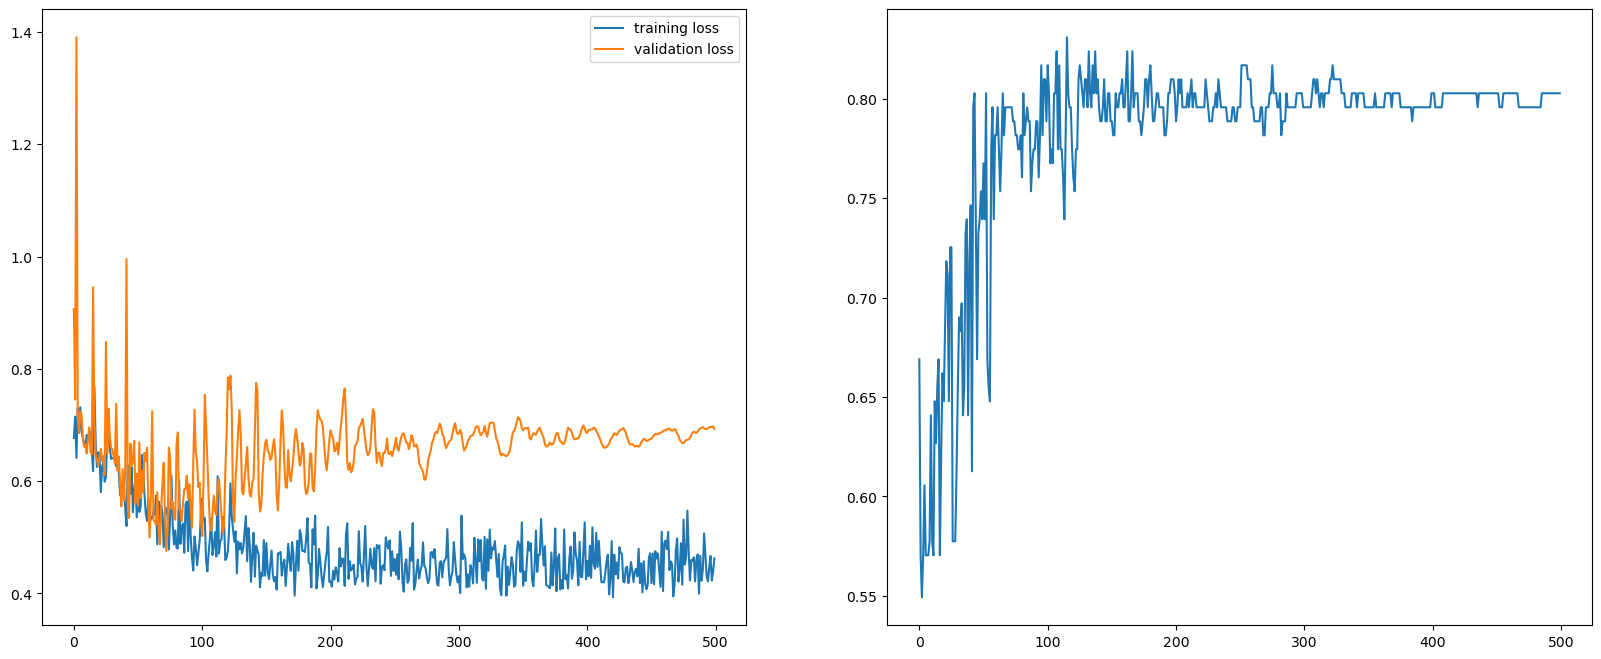

In [108]:
epochs = 500
n = 1
loss_func = F.cross_entropy
lr = 0.08
weight_decay = 1e-9
exponential = 0.99
p1_test = [0.3]
p2_test = [0.3]

# p1_test = [0,0.1,0.2,0.3,0.4,0.5]
# p2_test = [0,0.1,0.2,0.3,0.4,0.5]

maxmax = 0
minmin = 1
maxavg = 0
best_p1 = 0
best_p2 = 0
print("Average  |  Maximum  |  Minimum  |  p1  |  p2")
for p1 in p1_test:
    for p2 in p2_test:
        va,avg,max,min,lh,vlh,_ = test_loop(p1,p2,epochs,n,lr,weight_decay,exponential,plot5=False)
        print(avg,max,min,p1,p2)

        if avg > maxavg:
            maxavg = avg
            best_p1 = p1
            best_p2 = p2
            print("New Max Avg!")
        if max > maxmax:
            maxmax = max
        if min < minmin:
            minmin = min

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(lh,label="training loss")
plt.plot(vlh,label="validation loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(va[-1])


print(f"Maximum of Average accuracy at end of {epochs} epochs= {maxavg} at p1= {best_p1}, p2= {best_p2}")
print(f"Maximum of Max accuracy at end of {epochs} epochs= {maxmax}")
print(f"Minimum of Min accuracy at end of {epochs} epochs= {minmin}")

For some reason, I am not able to get even similar accuracy to the previous attempt using only 183 lines of train+val data. Maybe need to tune hyperparameters even better.

In [65]:
len(test_data2)

331

In [66]:
test_data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [67]:
test_data2['Sex'] = test_data2['Sex'].replace(sexdict)
test_data2['Embarked'] = test_data2['Embarked'].replace(embarkeddict)
test_data2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,0
411,1,1,37.0,1,0,90.0000,2
412,3,1,28.0,0,0,7.7750,0
414,1,1,39.0,0,0,108.9000,1


In [68]:
test_ds = Dataset(test_data2,test=True)
assert len(test_ds)==len(test_data2)

In [69]:
bs = 100
test_dl = DataLoader(test_ds, batch_size=bs*2, shuffle=False)

In [70]:
next(iter(test_dl))[0].shape

torch.Size([200, 7])

In [71]:
pred = torch.Tensor()
model.eval()
with torch.no_grad():
	tot_loss,tot_acc,count = 0.,0.,0
	for xb,yb in test_dl:
		pred = torch.cat([pred,model(xb)])

The below tensor contains the predictions

In [72]:
pred

tensor([[-8.5026e-02,  2.8315e-01],
        [ 1.0786e+00, -5.7416e-01],
        [ 1.7472e+00, -1.2018e+00],
        [-8.9428e-01,  1.0016e+00],
        [-4.4134e-01,  5.6332e-01],
        [-1.4724e+00,  1.3545e+00],
        [ 3.9612e-01, -1.7218e-01],
        [-1.1030e+00,  1.0168e+00],
        [-5.1172e-01,  5.7555e-01],
        [-1.6505e+00,  1.5123e+00],
        [ 9.7848e-02,  2.3394e-02],
        [-1.0078e+00,  8.9215e-01],
        [ 8.6359e-01, -4.8504e-01],
        [-7.4121e-02, -1.1608e-01],
        [-5.7443e-01,  4.9190e-01],
        [-3.3134e-02,  1.6263e-01],
        [-1.0985e+00,  1.1213e+00],
        [-2.2402e-01,  4.3326e-01],
        [ 1.2217e+00, -7.7510e-01],
        [-2.8327e-01,  5.0550e-02],
        [-1.3508e+00,  1.2451e+00],
        [-1.0508e+00,  9.5314e-01],
        [-9.8681e-01,  7.4722e-01],
        [ 2.7318e-01,  9.1055e-02],
        [-4.9359e-01,  4.2650e-01],
        [-1.0077e+00,  1.0531e+00],
        [-3.6420e-01,  3.5312e-01],
        [ 4.8761e-02,  1.472

# Task 2

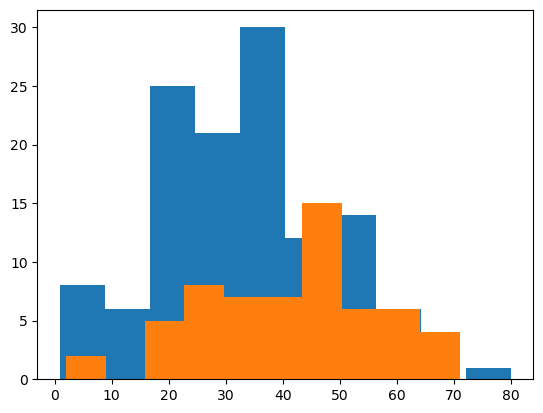

In [73]:
data = pd.read_csv("./train.csv").dropna()
survived = data[data["Survived"]==1]
dead = data[data["Survived"]==0]
plt.hist(survived["Age"])
plt.hist(dead["Age"])
plt.show()

Other significant variables (in order of significance) include: gender, number_siblings_abroad, ticket_class, and number_parents_abroad. Given this information, the best next step is to see by removing the insignificant variables (in order of insignificance) if that improves the model performance.

In [74]:
len(survived),len(dead)

(123, 60)

#### Dropping Cabin column follow by dropna()

In [75]:
len(data1)
data1 = data1.drop(columns="Cabin")
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [76]:
data1 = data1.dropna()
len(data1)

712

In [77]:
survived = data1[data1["Survived"]==1]
dead = data1[data1["Survived"]==0]
len(survived),len(dead)

(288, 424)

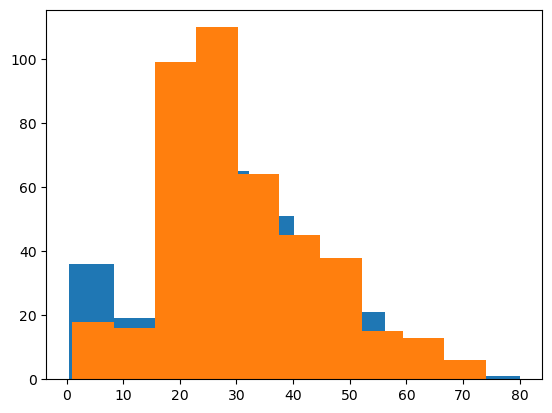

In [78]:
plt.hist(survived["Age"])
plt.hist(dead["Age"])
plt.show()

In [79]:
data2 = data1.drop(columns=['PassengerId','Ticket','Name'])
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [80]:
sexdict = {}
embarkeddict = {}

for i,item in enumerate(data2['Sex'].unique()):
    sexdict[item] = i
for i,item in enumerate(data2['Embarked'].unique()):
    embarkeddict[item] = i
data2['Sex'] = data2['Sex'].replace(sexdict)
data2['Embarked'] = data2['Embarked'].replace(embarkeddict)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Using correlation matrix to find statistical significance

In [81]:
data2.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,0.108517
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.108502
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,0.097129
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.004021
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.014082
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.176859
Embarked,0.108517,-0.108502,0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000


Clearly, Sex > Pclass > Fare > Embarked > Parch > Age > SibSp in terms of correlation with Survived. Thus, Age is a minor parameter.

Lets go to point 2 of the possible reasons:

Passenger_age played a minor factor, but it's significance was dwarfted by the gender variable - so you should rerun your regression of survival outcomes against gender only, then take the residuals from that and regress those residuals against passenger_age

In [82]:
def get_model(p1,p2):
    layers = nn.ModuleList([nn.Linear(1,1,bias=True,dtype=float),
                            nn.Sigmoid()])
    model = Model(layers)
    return model

In [83]:
print(len(data2))
train_df = data2.sample(frac=0.8)
val_df = data2.drop(train_df.index)
print(len(train_df))
print(len(val_df))
print(len(train_data))
train_df

712
570
142
183


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
155,0,1,0,51.0,0,1,61.3792,1
806,0,1,0,39.0,0,0,0.0000,0
729,0,3,1,25.0,1,0,7.9250,0
494,0,3,0,21.0,0,0,8.0500,0
92,0,1,0,46.0,1,0,61.1750,0
...,...,...,...,...,...,...,...,...
590,0,3,0,35.0,0,0,7.1250,0
271,1,3,0,25.0,0,0,0.0000,0
267,1,3,0,25.0,1,0,7.7750,0
474,0,3,1,22.0,0,0,9.8375,0


In [84]:
train_ds,val_ds = (Dataset(train_df,drop_cols=['Pclass','Age','SibSp','Parch','Fare','Embarked']),
                   Dataset(val_df,drop_cols=['Pclass','Age','SibSp','Parch','Fare','Embarked']))
assert len(train_ds)==len(train_df)
assert len(val_ds)==len(val_df)

In [85]:
bs = 100
train_dl,valid_dl = get_dls(train_ds, val_ds, bs)

In [86]:
model = get_model(0,0)

In [87]:
accuracy(model(train_ds.x),train_ds.y)
# model(train_ds.x)

tensor(0.4070)

In [88]:
model(train_ds.x)

tensor([[0.6346],
        [0.6346],
        [0.8213],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.8213],
        [0.6346],
        [0.8213],
        [0.8213],
        [0.8213],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.8213],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.8213],
        [0.8213],
        [0.6346],
        [0.8213],
        [0.6346],
        [0.8213],
        [0.6346],
        [0.6346],
        [0.8213],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.8213],
        [0.8213],
        [0.8213],
        [0.8213],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0.6346],
        [0

In [89]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[0.9736]], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([0.5518], dtype=torch.float64, requires_grad=True)


/var/folders/c1/p9_k34rn3ts62n7p14f6tdvw0000gn/T/ipykernel_40211/2720206546.py:11: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_func(model(xb), yb)
/var/folders/c1/p9_k34rn3ts62n7p14f6tdvw0000gn/T/ipykernel_40211/2720206546.py:11: UserWarning: Using a target size (torch.Size([70])) that is different to the input size (torch.Size([70, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_func(model(xb), yb)
/var/folders/c1/p9_k34rn3ts62n7p14f6tdvw0000gn/T/ipykernel_40211/2720206546.py:28: UserWarning: Using a target size (torch.Size([142])) that is different to the input size (torch.Size([142, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  tot_loss += loss_func(pred,yb).item

0.6056337952613831 0.6056337952613831 0.6056337952613831
0.0 True


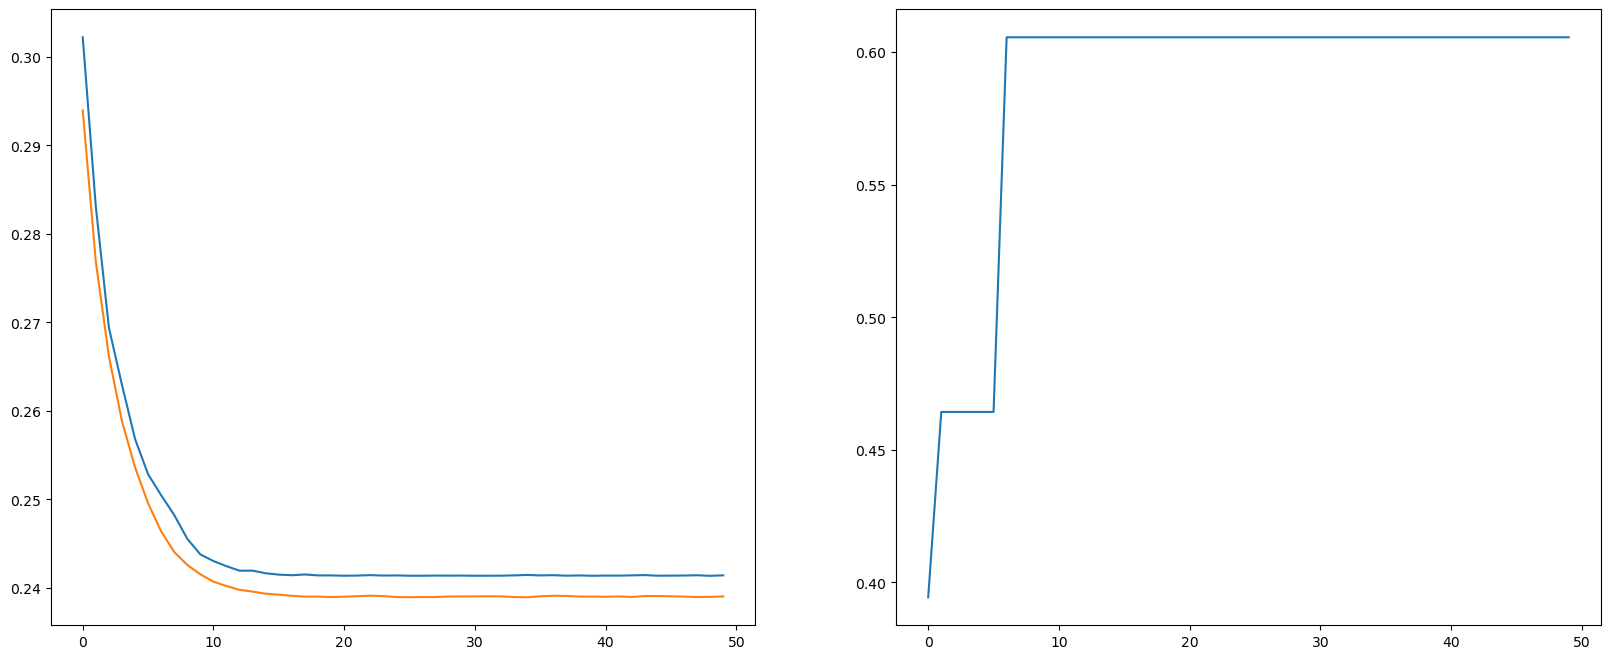

In [90]:
epochs = 50
n = 5
loss_func = F.mse_loss
lr = 0.03
weight_decay = 1e-6
exponential = 0.99
# p1 = 0.3
# p2 = 0.2

# p_test = [0,0.1,0.2,0.3,0.4,0.5,0.6]

# maxmax = 0
# minmin = 1
# maxavg = 0
# best_p1 = 0
# best_p2 = 0
# print("Average  |  Maximum  |  Minimum  |  p1  |  p2")
# for p1 in p_test:
#     for p2 in p_test:
va,avg,max,min,lh,vlh,model1 = test_loop(p1,p2,epochs,n,lr,weight_decay,exponential,plot5=False)
print(avg,max,min)
diff = max-min
print(diff, diff==0)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(lh)
plt.plot(vlh)

plt.subplot(1,2,2)
plt.plot(va[-1])

In [93]:
residual = model1(val_ds.x).round() - train_ds.y
residual

tensor([[ 0.,  0.,  0.,  ..., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.]], dtype=torch.float64,
       grad_fn=<SubBackward0>)

The regression of survival outcomes against sex gives us model1 shown above. The residual is also calculated above. I didn't get if we need to now train passenger age on this residual? It has 3 values now {-1,0,1}. Also what do we infer from that?

---

#### Reasoning to the points at the end of task

Point 1: There are significant factors as is visible through the correlation matrix, hence wrong

Point 2: Passenger age and Gender do have a large correlation compared to others, so this might be true.

Point 3: Doesn't seem like all the four significant factors dwarf it.

Point 4: If the model wants, it can create passenger-age^2, so I feel it isn't needed.

Point 5: Data is skewed, this is true and might help slightly with the accuracy.